In [ ]:
#!pip install fbprophet

In [1]:
import numpy as np
import pandas as pd
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot
from sklearn.model_selection import train_test_split
import plotly.offline as py
import matplotlib.pyplot as plt
py.init_notebook_mode()
%matplotlib inline

In [40]:
df = pd.read_csv("./data/avocado.csv").drop(columns=["Unnamed: 0"])
df.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0  2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1  2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2  2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3  2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4  2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

In [41]:
df.Date.nunique()

169

In [42]:
train_df = pd.DataFrame()
train_df['ds'] = pd.to_datetime(df["Date"])
train_df['y'] = df.iloc[:,1]
train_df.head()

ds     y
0 2015-12-27  1.33
1 2015-12-20  1.35
2 2015-12-13  0.93
3 2015-12-06  1.08
4 2015-11-29  1.28

In [43]:
# Initializing basic prophet model:
basic_prophet_model = Prophet()
basic_prophet_model.fit(train_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [44]:
# Creating future dataframe for forecast:
future_df = basic_prophet_model.make_future_dataframe(include_history=True,periods=300)
future_df.tail()

ds
464 2019-01-15
465 2019-01-16
466 2019-01-17
467 2019-01-18
468 2019-01-19

In [45]:
future_df.head()

ds
0 2015-01-04
1 2015-01-11
2 2015-01-18
3 2015-01-25
4 2015-02-01

In [46]:
# Getting the forecast
forecast_df = basic_prophet_model.predict(future_df)

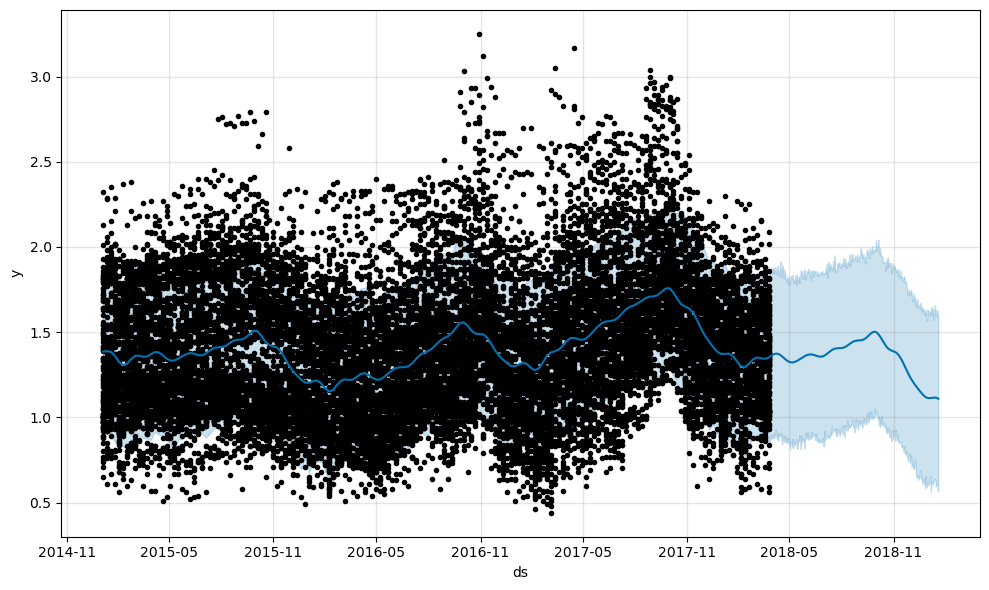

In [47]:
plot1 = basic_prophet_model.plot(forecast_df)

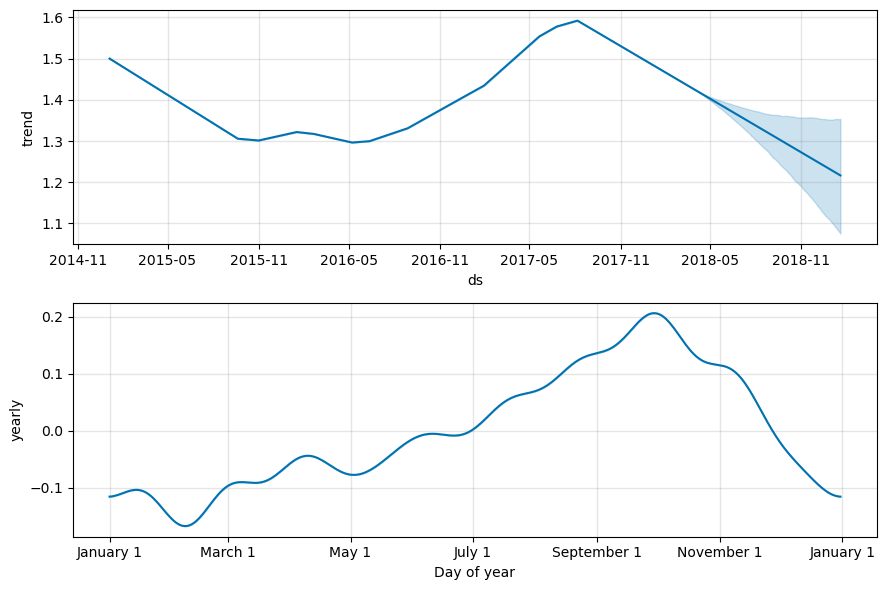

In [48]:
# to view  the forecast components
plot2 = basic_prophet_model.plot_components(forecast_df)

## Change points

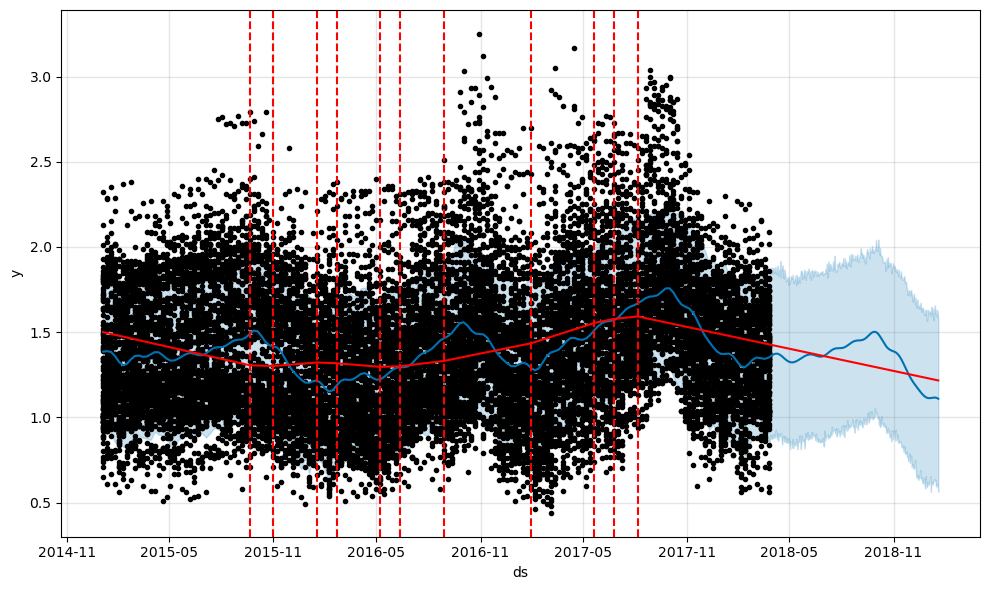

In [49]:
# Prophet detects changepoints by first specifying a large number of potential changepoints at which the rate is allowed to change
# Plotting the changepoints
plot3 = basic_prophet_model.plot(forecast_df)
adding_changepoints = add_changepoints_to_plot(plot3.gca(), basic_prophet_model, forecast_df)

In [50]:
# printing the change points:
basic_prophet_model.changepoints

584     2015-02-08
1168    2015-03-15
1752    2015-04-26
2336    2015-05-31
2920    2015-07-12
3504    2015-08-16
4087    2015-09-20
4671    2015-11-01
5255    2015-12-06
5839    2016-01-17
6423    2016-02-21
7007    2016-03-27
7591    2016-05-08
8175    2016-06-12
8759    2016-07-24
9343    2016-08-28
9927    2016-10-02
10511   2016-11-13
11094   2016-12-18
11678   2017-01-29
12262   2017-03-05
12846   2017-04-09
13430   2017-05-21
14014   2017-06-25
14598   2017-08-06
Name: ds, dtype: datetime64[ns]

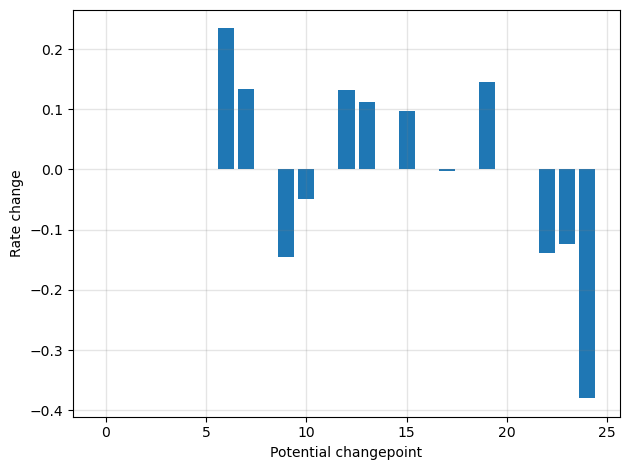

In [51]:
# checking the magnitude of the change points:
deltas = basic_prophet_model.params['delta'].mean(0)
plot4 = plt.figure(facecolor='w')
ax = plot4.add_subplot(111)
ax.bar(range(len(deltas)), deltas)
ax.grid(True, which='major', c='gray', ls='-', lw=1, alpha=0.2)
ax.set_ylabel('Rate change')
ax.set_xlabel('Potential changepoint')
plot4.tight_layout()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


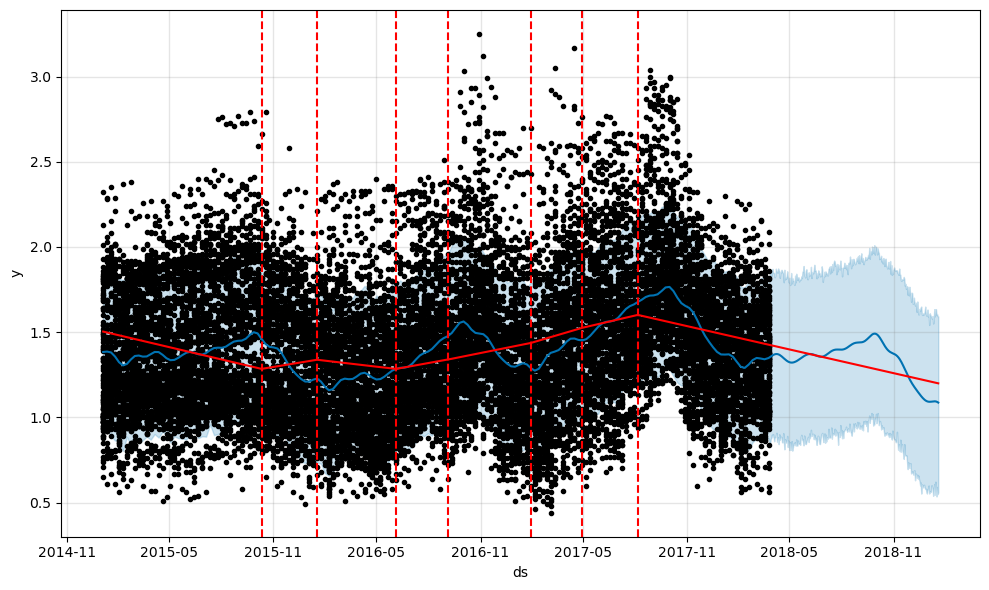

In [52]:
# setting the n_changepoints as hyperparameter:
prophet_model_changepoint= Prophet(n_changepoints=20, yearly_seasonality=True)
# getting the forecast
forecast_df_changepoint = prophet_model_changepoint.fit(train_df).predict(future_df)
# plotting the forecast with change points
plot5 = prophet_model_changepoint.plot(forecast_df_changepoint)
adding_changepoints = add_changepoints_to_plot(plot5.gca(), prophet_model_changepoint, forecast_df_changepoint)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


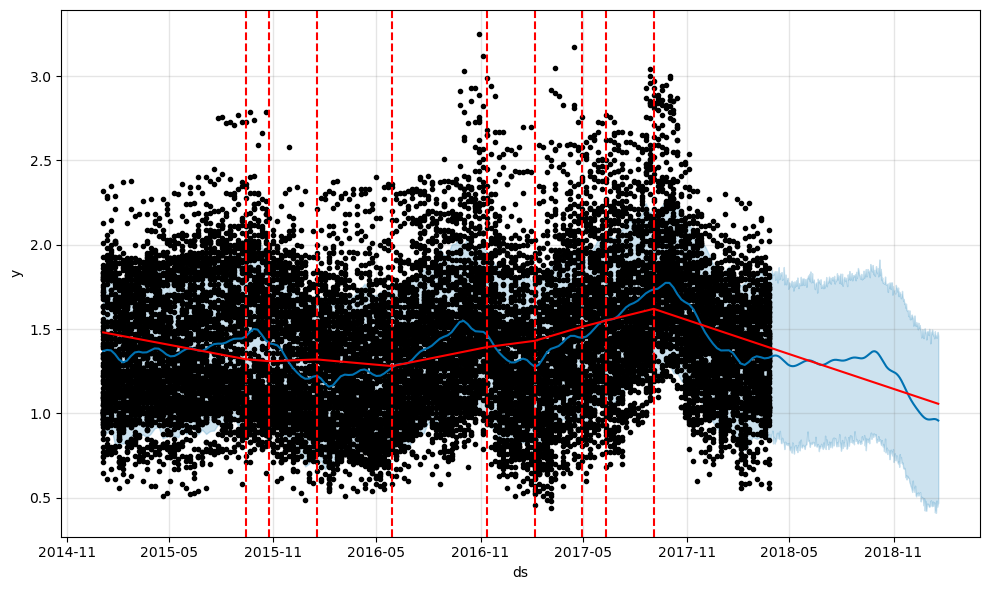

In [55]:
# setting the changepoint_range as hyperparameter:
prophet_model_changepoint2 = Prophet(changepoint_range=0.9, yearly_seasonality=True)
# getting the forecast
forecast_df_changepoint2 = prophet_model_changepoint2.fit(train_df).predict(future_df)
# plotting the forecast with change points
plot6 = prophet_model_changepoint2.plot(forecast_df_changepoint2)
adding_changepoints = add_changepoints_to_plot(plot5.gca(), prophet_model_changepoint2, forecast_df_changepoint2)

## Adjusting trend

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


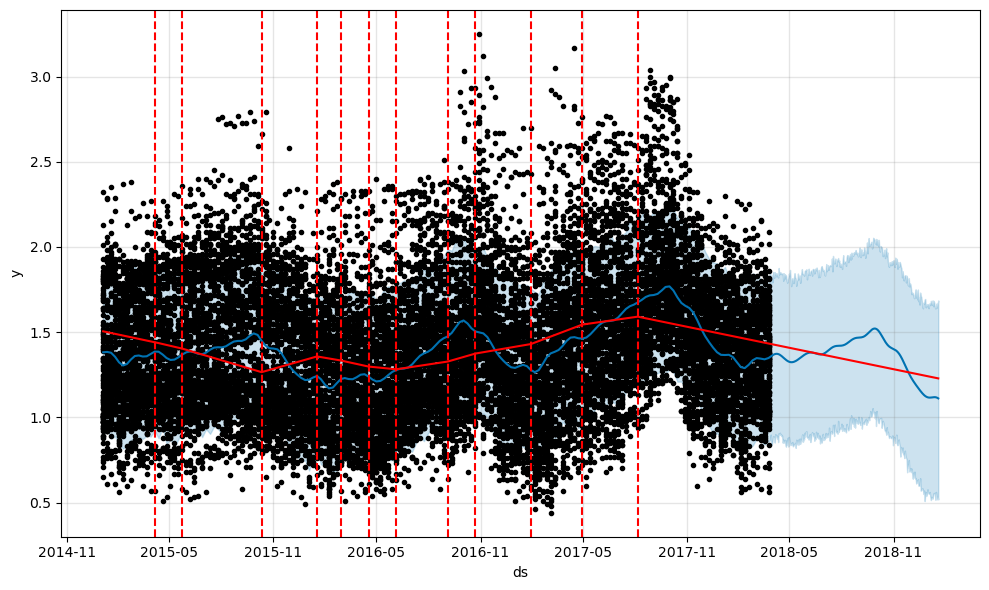

In [53]:
# setting the changepoint_prior_scale as hyperparameter:
prophet_model_trend = Prophet(n_changepoints=20, yearly_seasonality=True, changepoint_prior_scale=0.08)
# getting the forecast
forecast_df_trend = prophet_model_trend.fit(train_df).predict(future_df)
# plotting the forecast with change points
plot7 = prophet_model_trend.plot(forecast_df_trend)
adding_changepoints = add_changepoints_to_plot(plot7.gca(), prophet_model_trend, forecast_df_trend)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


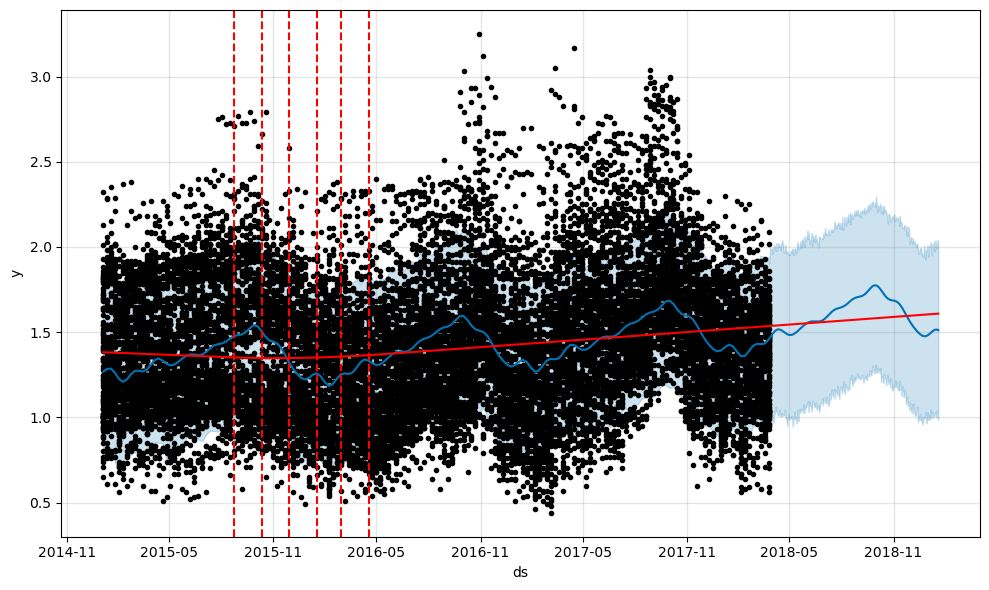

In [54]:
# setting the changepoint_prior_scale as hyperparameter:
prophet_model_trend2 = Prophet(n_changepoints=20, yearly_seasonality=True, changepoint_prior_scale=0.001)
# getting the forecast
forecast_df_trend2 = prophet_model_trend2.fit(train_df).predict(future_df)
# plotting the forecast with change points
plot8 = prophet_model_trend2.plot(forecast_df_trend2)
adding_changepoints = add_changepoints_to_plot(plot8.gca(), prophet_model_trend2, forecast_df_trend2)

## Holidays

In [56]:
# creating a custom holidays dataframe
holidays_df = pd.DataFrame({
  'holiday': 'avocado season',
  'ds': pd.to_datetime(['2014-07-31', '2014-09-16', 
                        '2015-07-31', '2015-09-16',
                        '2016-07-31', '2016-09-16',
                        '2017-07-31', '2017-09-16',
                       '2018-07-31', '2018-09-16',
                        '2019-07-31', '2019-09-16']),
  'lower_window': -1,
  'upper_window': 0,
})

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


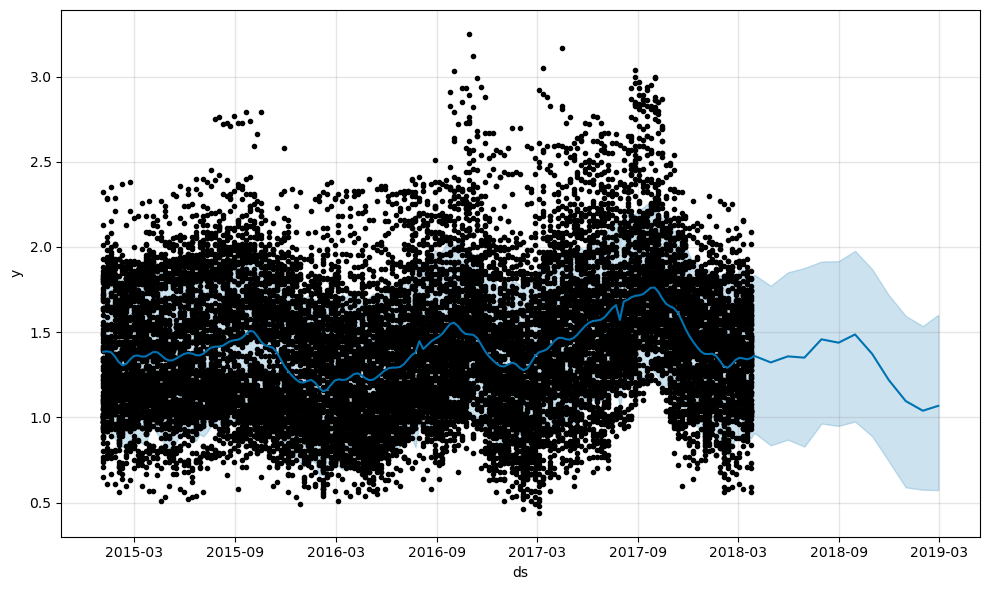

In [57]:
# Initializing prophet model with holidays dataframe:
prophet_model_holiday = Prophet(holidays=holidays_df)
prophet_model_holiday.fit(train_df)
# Creating future dataframe for forecast:
future_df = prophet_model_holiday.make_future_dataframe(periods=12, freq = 'm')
# Getting the forecast
forecast_df = prophet_model_holiday.predict(future_df)
prophet_model_holiday.plot(forecast_df)

## Adding multiple regressors

In [67]:
# Label encoding type column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.iloc[:,10] = le.fit_transform(df.iloc[:,10])
df.head(2)

Date  AveragePrice  Total Volume     4046      4225   4770  \
0  2015-12-27          1.33      64236.62  1036.74  54454.85  48.16   
1  2015-12-20          1.35      54876.98   674.28  44638.81  58.33   

   Total Bags  Small Bags  Large Bags  XLarge Bags  type  year  region  
0     8696.87     8603.62       93.25          0.0     0  2015  Albany  
1     9505.56     9408.07       97.49          0.0     0  2015  Albany

In [68]:
data = df[['Date', 'Total Volume', '4046', '4225', '4770', 'Small Bags', 'type']]
data.rename(columns={'Date':'ds'},inplace=True)
data['y'] = df.iloc[:,1]

C:\Users\vadi_\anaconda3\envs\recommenders_env\lib\site-packages\pandas\core\frame.py:5047: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\vadi_\anaconda3\envs\recommenders_env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [69]:
# train-test split
train_df = data[:18000]
test_df = data[18000:]

In [70]:
#Initializing Prophet model and adding additional Regressor
prophet_model_regressor = Prophet()
prophet_model_regressor.add_regressor('type')
prophet_model_regressor.add_regressor('Total Volume')
prophet_model_regressor.add_regressor('4046')
prophet_model_regressor.add_regressor('4225')
prophet_model_regressor.add_regressor('4770')
prophet_model_regressor.add_regressor('Small Bags')

In [71]:
# Fitting the data
prophet_model_regressor.fit(train_df)
future_df = prophet_model_regressor.make_future_dataframe(periods=249)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


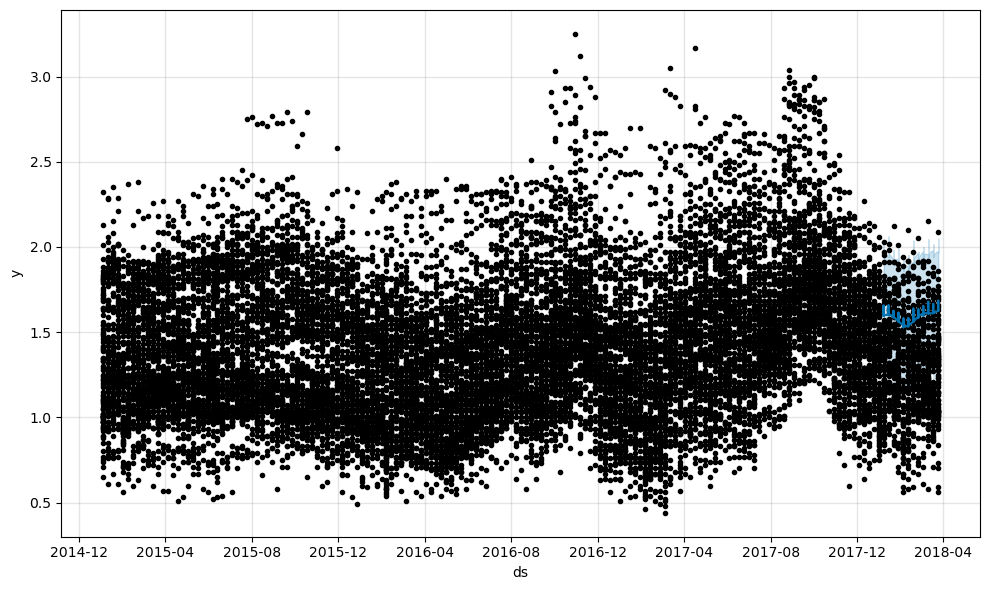

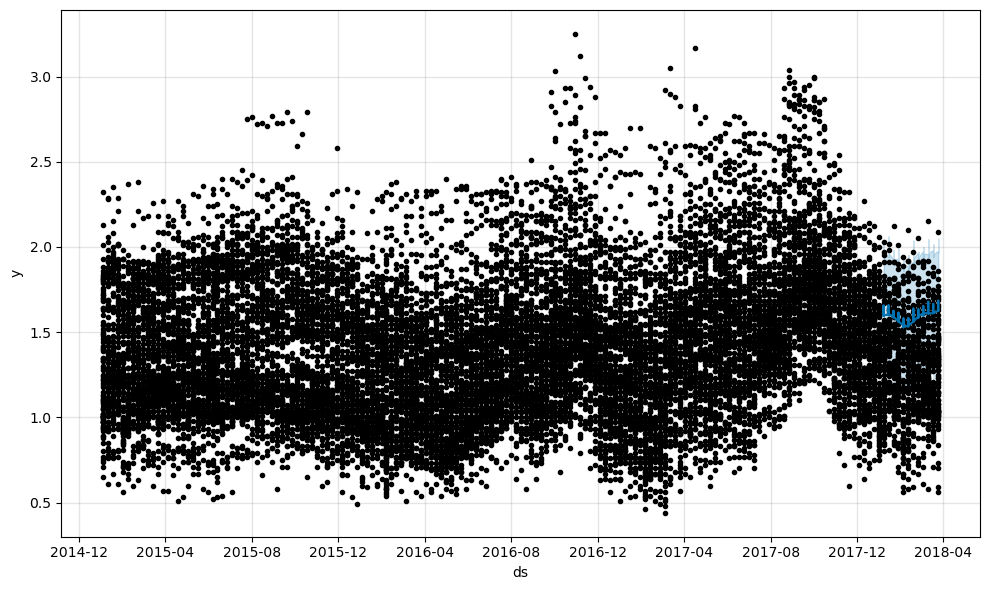

In [73]:
# forecast the data on test
forecast_df = prophet_model_regressor.predict(test_df)
prophet_model_regressor.plot(forecast_df)

In [ ]:
#VAR

In [1]:
#import all the required libraries
import pandas as pd
from math import sqrt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.vector_ar.var_model import VAR

In [4]:
#read data
var_data = pd.read_excel('../data/AirQualityUCI.xlsx', parse_dates=[['Date', 'Time']])
var_data.head()

Date_Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0 2004-03-10 18:00:00     2.6      1360.00       150  11.881723   
1 2004-03-10 19:00:00     2.0      1292.25       112   9.397165   
2 2004-03-10 20:00:00     2.2      1402.00        88   8.997817   
3 2004-03-10 21:00:00     2.2      1375.50        80   9.228796   
4 2004-03-10 22:00:00     1.6      1272.25        51   6.518224   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0        1045.50    166.0       1056.25    113.0       1692.00      1267.50   
1         954.75    103.0       1173.75     92.0       1558.75       972.25   
2         939.25    131.0       1140.00    114.0       1554.50      1074.00   
3         948.25    172.0       1092.00    122.0       1583.75      1203.25   
4         835.50    131.0       1205.00    116.0       1490.00      1110.00   

       T         RH        AH  
0  13.60  48.875001  0.757754  
1  13.30  47.700000  0.725487  
2  11.90  53.975000  0.750239  
3  11.00  60.000000  0.786713  
4  11.15  59.575001  0.788794

In [5]:
var_data['Date_Time'] = pd.to_datetime(var_data.Date_Time ,
format = '%d/%m/%Y %H.%M.%S')
var_data1 = var_data.drop(['Date_Time'], axis=1)
var_data1.index = var_data.Date_Time
var_data1.head()

CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  PT08.S2(NMHC)  \
Date_Time                                                                      
2004-03-10 18:00:00     2.6      1360.00       150  11.881723        1045.50   
2004-03-10 19:00:00     2.0      1292.25       112   9.397165         954.75   
2004-03-10 20:00:00     2.2      1402.00        88   8.997817         939.25   
2004-03-10 21:00:00     2.2      1375.50        80   9.228796         948.25   
2004-03-10 22:00:00     1.6      1272.25        51   6.518224         835.50   

                     NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
Date_Time                                                           
2004-03-10 18:00:00    166.0       1056.25    113.0       1692.00   
2004-03-10 19:00:00    103.0       1173.75     92.0       1558.75   
2004-03-10 20:00:00    131.0       1140.00    114.0       1554.50   
2004-03-10 21:00:00    172.0       1092.00    122.0       1583.75   
2004-03-10 22:00:00    131.0       1205.00    116.0       1490.00   

                     PT08.S5(O3)      T         RH        AH  
Date_Time                                                     
2004-03-10 18:00:00      1267.50  13.60  48.875001  0.757754  
2004-03-10 19:00:00       972.25  13.30  47.700000  0.725487  
2004-03-10 20:00:00      1074.00  11.90  53.975000  0.750239  
2004-03-10 21:00:00      1203.25  11.00  60.000000  0.786713  
2004-03-10 22:00:00      1110.00  11.15  59.575001  0.788794

In [6]:
#missing value treatment
cols = var_data1.columns
for j in cols:
    for i in range(0,len(var_data1)):
        if var_data1[j][i] == -200:
            var_data1[j][i] = var_data1[j][i-1]

C:\Users\vadi_\AppData\Local\Temp/ipykernel_12688/3220411477.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var_data1[j][i] = var_data1[j][i-1]


In [7]:
#checking stationarity
from statsmodels.tsa.vector_ar.vecm import coint_johansen
#since the test works for only 12 variables, I have randomly dropped
#in the next iteration, I would drop another and check the eigenvalues
test = var_data1.drop([ 'CO(GT)'], axis=1)
coint_johansen(test,-1,1).eig

array([1.75628733e-01, 1.52399674e-01, 1.15090998e-01, 1.04309966e-01,
       9.29562919e-02, 6.90255307e-02, 5.76654697e-02, 3.43596700e-02,
       3.06350634e-02, 1.18801270e-02, 2.46819409e-03, 7.09473977e-05])

In [8]:
#creating the train and validation set
train_data = var_data1[:int(0.8*(len(var_data1)))]
valid_data = var_data1[int(0.8*(len(var_data1))):]

In [9]:
##fit the model
from statsmodels.tsa.vector_ar.var_model import VAR
var_model = VAR(endog=train_data)
var_model_fit = var_model.fit()
# make prediction on validation
pred = var_model_fit.forecast(var_model_fit.endog,
steps=len(valid_data))
pred

C:\Users\vadi_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


array([[8.88161065e-01, 8.41803964e+02, 2.71644320e+02, ...,
        1.05743863e+01, 3.48713152e+01, 4.37277520e-01],
       [9.92424381e-01, 8.66262441e+02, 2.69327633e+02, ...,
        9.85432359e+00, 3.74025472e+01, 4.42645045e-01],
       [1.10490663e+00, 8.90900736e+02, 2.67743663e+02, ...,
        9.24271941e+00, 3.96241504e+01, 4.47398014e-01],
       ...,
       [2.13383727e+00, 1.10685527e+03, 2.69411125e+02, ...,
        2.01829088e+01, 4.88992477e+01, 1.11131218e+00],
       [2.13383726e+00, 1.10685527e+03, 2.69411126e+02, ...,
        2.01829090e+01, 4.88992475e+01, 1.11131220e+00],
       [2.13383724e+00, 1.10685527e+03, 2.69411126e+02, ...,
        2.01829093e+01, 4.88992474e+01, 1.11131221e+00]])

In [10]:
##converting predictions to dataframe
pred1 = pd.DataFrame(index=range(0,len(pred)),columns=[cols])
for j in range(0,13):
    for i in range(0, len(pred1)):
        pred1.iloc[i][j] = pred[i][j]
pred1

CO(GT)  PT08.S1(CO)    NMHC(GT)   C6H6(GT) PT08.S2(NMHC)     NOx(GT)  \
0     0.888161   841.803964   271.64432   1.982632    595.965721   137.03066   
1     0.992424   866.262441  269.327633   2.332532    619.914837  158.117747   
2     1.104907   890.900736  267.743663   2.832077    645.634216  177.729196   
3     1.219987   914.919521  266.664032   3.407752    671.662218  195.906115   
4     1.333743   937.819088  265.921087   4.011249    697.061083  212.682873   
...        ...          ...         ...        ...           ...         ...   
1867  2.133837  1106.855274  269.411125  10.807054    966.524358  228.625867   
1868  2.133837  1106.855272  269.411125  10.807054    966.524357  228.625864   
1869  2.133837   1106.85527  269.411125  10.807054    966.524357  228.625861   
1870  2.133837  1106.855268  269.411126  10.807054    966.524356  228.625857   
1871  2.133837  1106.855266  269.411126  10.807054    966.524355  228.625854   

     PT08.S3(NOx)     NO2(GT) PT08.S4(NO2)  PT08.S5(O3)          T         RH  \
0     1119.615156   87.815339    829.84466   546.026663  10.574386  34.871315   
1     1098.381882   90.537193   856.405973   598.407982   9.854324  37.402547   
2      1078.45843   93.115608   885.665916   648.974793   9.242719   39.62415   
3     1059.928335    95.57167   915.647307   697.359008   8.722839  41.579793   
4     1042.817739   97.910723    945.09167   743.269637   8.281647  43.304705   
...           ...         ...          ...          ...        ...        ...   
1867   843.010179  101.410243  1534.884856  1039.936425  20.182908  48.899248   
1868   843.010179  101.410243  1534.884861   1039.93642  20.182909  48.899248   
1869   843.010179  101.410242  1534.884866  1039.936415  20.182909  48.899248   
1870   843.010179  101.410242  1534.884871  1039.936411  20.182909  48.899248   
1871   843.010179  101.410241  1534.884876  1039.936406  20.182909  48.899247   

            AH  
0     0.437278  
1     0.442645  
2     0.447398  
3      0.45174  
4     0.455804  
...        ...  
1867  1.111312  
1868  1.111312  
1869  1.111312  
1870  1.111312  
1871  1.111312  

[1872 rows x 13 columns]

In [11]:
##check rmse
for i in cols:
    print('rmse value for', i, 'is : ', sqrt(mean_squared_error(pred1[i], valid_data[i])))

rmse value for CO(GT) is :  1.4086965424453717
rmse value for PT08.S1(CO) is :  205.91037633783077
rmse value for NMHC(GT) is :  6.670741427437189
rmse value for C6H6(GT) is :  7.130304477798198
rmse value for PT08.S2(NMHC) is :  277.8562837313786
rmse value for NOx(GT) is :  214.75793797684517
rmse value for PT08.S3(NOx) is :  244.9612992892038
rmse value for NO2(GT) is :  66.65226538130746
rmse value for PT08.S4(NO2) is :  490.0528665298938
rmse value for PT08.S5(O3) is :  446.50499189023094
rmse value for T is :  10.722429361324773
rmse value for RH is :  17.114848634832015
rmse value for AH is :  0.5216105887725615


In [13]:
#Auto-Arima

In [ ]:
#import all the required libraries
import pandas as pd
from pmdarima.arima import auto_arima
from pmdarima.arima import ADFTest
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score

In [ ]:
#read data
auto_arima_data = pd.read_csv('auto_arima_data.txt')
auto_arima_data.head()

In [ ]:
#check missing values
auto_arima_data.isnull().sum()

In [ ]:
#check datatype
auto_arima_data.info()

In [ ]:
#convert object to datatime and set index
auto_arima_data['Month'] = pd.to_datetime(auto_arima_data['Month'])
auto_arima_data.set_index('Month',inplace=True)
auto_arima_data.head()

In [ ]:
#line plot to understand the pattern
auto_arima_data.plot()

In [ ]:
#Stationarity check
stationary_test = ADFTest(alpha= 0.05)
stationary_test.should_diff(auto_arima_data)

In [ ]:
#train test split and plot
train_data = auto_arima_data[:85]
test_data = auto_arima_data[-20:]
plt.plot(train_data)
plt.plot(test_data)

In [ ]:
#model building with parameters
auto_arima_model = auto_arima(train_data, start_p = 0, d=1,
start_q = 0, max_p = 5, max_d = 5,max_q= 5, start_P = 0, D=1,
start_Q = 0, max_P = 5, max_D = 5,
max_Q= 5, m=12, seasonal = True,
error_action = 'warn', trace = True, supress_warnings= True,
stepwise = True, random_state =20,
n_fits = 50)

In [ ]:
#model summary
auto_arima_model.summary()

In [ ]:
#forecasting on test set
pred = pd.DataFrame(auto_arima_model.predict(n_periods = 20),
index = test_data.index)
pred.columns= ['pred_sales']
#plot
plt.figure(figsize=(8,5))
plt.plot(train_data, label = "Training data")
plt.plot(test_data, label = "Test data")
plt.plot(pred, label = "Predicted data")
plt.legend()
plt.show()

In [ ]:
#Evaluating using r square score
test_data['prediction'] = pred
r2_score(test_data['Champagne sales'],test_data['prediction'])